# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warning
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Data

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows and Columns count

In [3]:
print("Number of rows are :",df.shape[0])
print("Number of columns :", df.shape[1])

Number of rows are : 150
Number of columns : 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Duplicate Value

In [5]:
dup = df.duplicated().sum()
print(f'number of duplicate rows are {dup}')

number of duplicate rows are 3


### Missing values

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.describe(include = 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


### Unique values

In [9]:
for i in df.columns.tolist():
    print("Number of unique values in ",i,"is",df[i].nunique())

Number of unique values in  sepal_length is 35
Number of unique values in  sepal_width is 23
Number of unique values in  petal_length is 43
Number of unique values in  petal_width is 22
Number of unique values in  species is 3


## Data Visualization

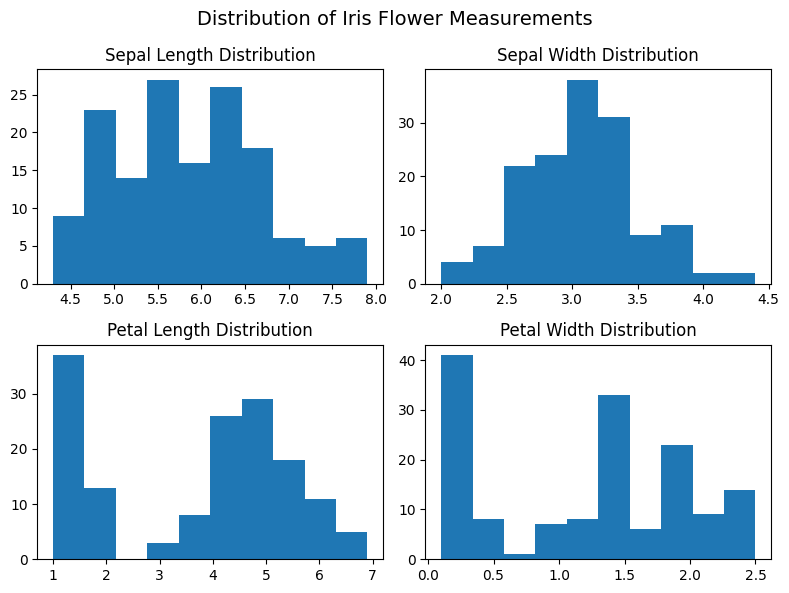

In [10]:
# Distribution of Numerical Variables

plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

#### Sepal Length vs Sepal width

In [11]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

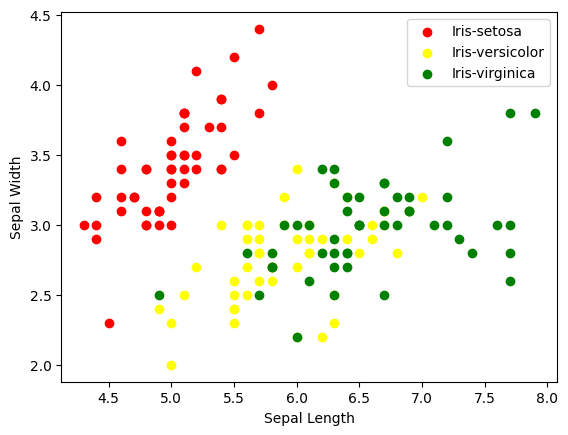

In [12]:
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Petal length vs petal width

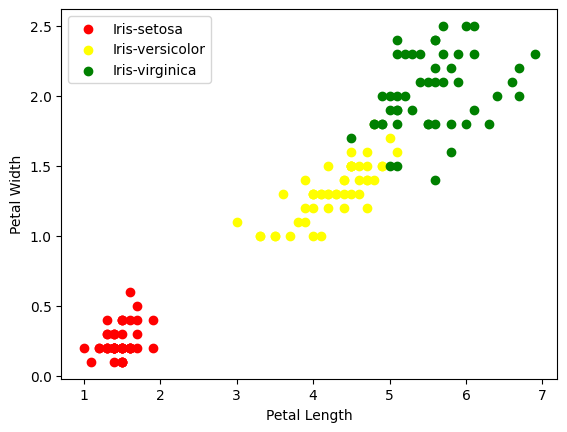

In [13]:
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Sepal length vs Petal length

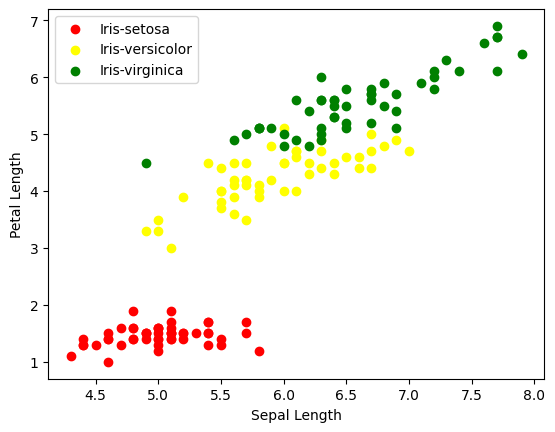

In [14]:
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Sepal Width vs Petal Width

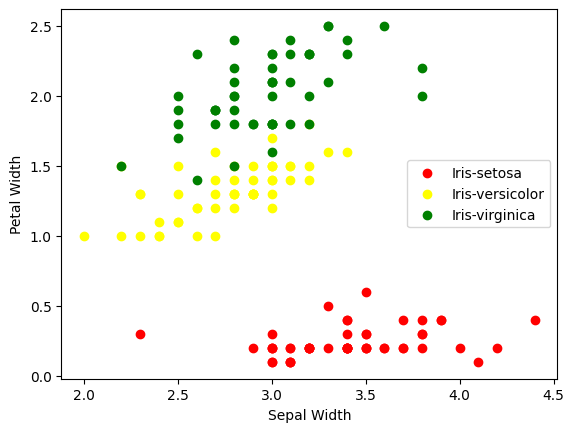

In [15]:
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### Correlation Heatmap

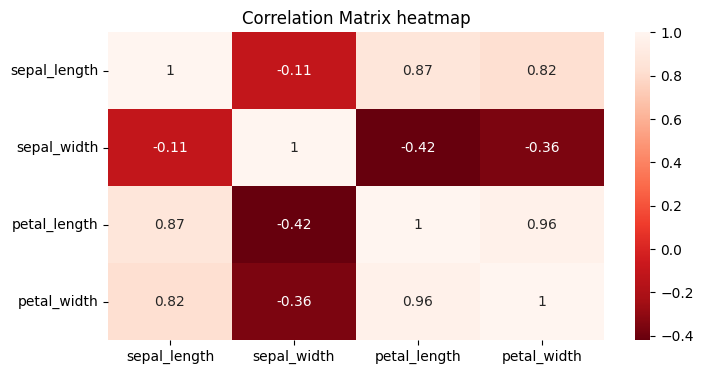

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Correlation Heatmap Visualization Code
corr_matrix = numeric_df.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

# Feature Engineering And Data Pre-processing

In [17]:
LE = LabelEncoder()

df['species'] = LE.fit_transform(df['species'])

unique_s = df['species'].unique()

print("Encoded Species Values: ")
print(unique_s)

Encoded Species Values: 
[0 1 2]


### Data Scaling

In [18]:
x = df.drop(columns=['species'],axis=1)
y = df['species']

### Data Splitting

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

In [20]:
y_train.value_counts()

species
0    42
2    32
1    31
Name: count, dtype: int64

### Model Implementation

In [21]:
def ev_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    cm_train = confusion_matrix(y_train,y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    print("\nConfusion Matrix:")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
   
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [22]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

### Logistic Regression

In [23]:
LRModel = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


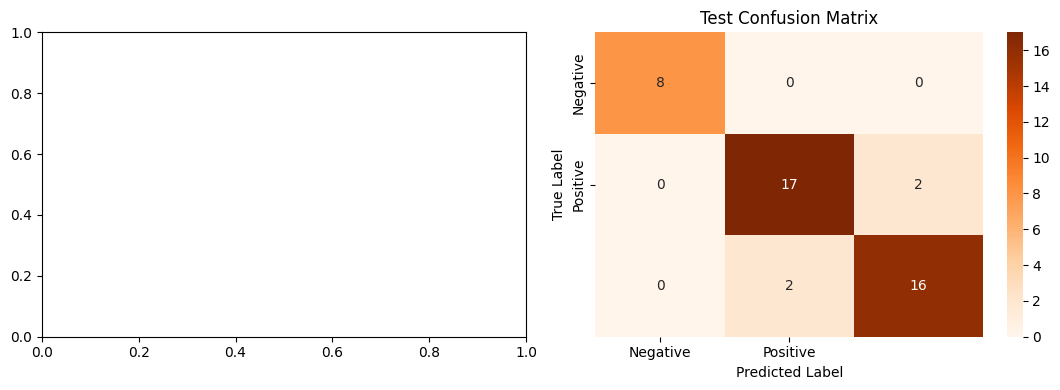


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  42        |
| 1            |    1        | 0.967742 |   0.983607 |  31        |
| 2            |    0.969697 | 1        |   0.984615 |  32        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989899 | 0.989247 |   0.989407 | 105        |
| weighted avg |    0.990765 | 0.990476 |   0.990471 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  8        |
| 1            |    0.894737 | 0.894737 |   0.894737 | 19        |
| 2            |    0.888889 | 0.888889 |   0.888889 | 18        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [24]:
LRScore = ev_model(LRModel, x_train, x_test, y_train, y_test)

In [25]:
score['Logestic Regression'] = LRScore
score

,Logestic Regression
Precision Train,0.990765
Precision Test,0.911111
Recall Train,0.990476
Recall Test,0.911111
Accuracy Train,0.990476
Accuracy Test,0.911111
F1 macro Train,0.990471
F1 macro Test,0.911111


In [26]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [27]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


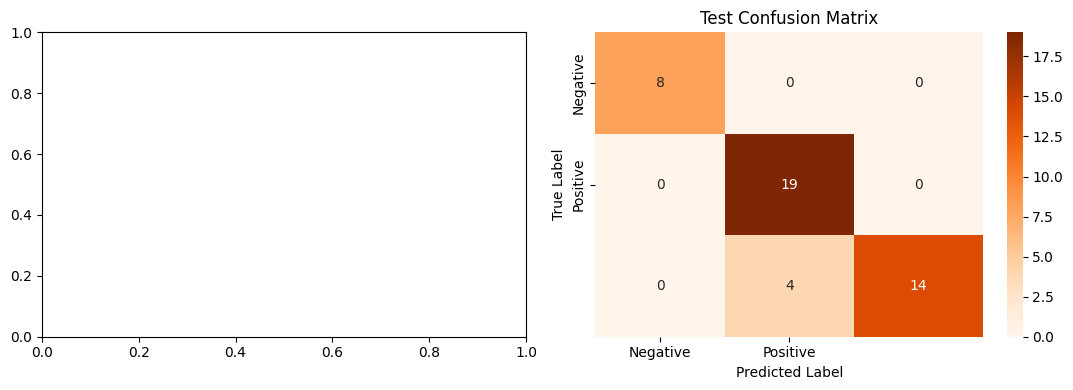


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  42        |
| 1            |    1        | 0.967742 |   0.983607 |  31        |
| 2            |    0.969697 | 1        |   0.984615 |  32        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989899 | 0.989247 |   0.989407 | 105        |
| weighted avg |    0.990765 | 0.990476 |   0.990471 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        |  8        |
| 1            |    0.826087 | 1        |   0.904762 | 19        |
| 2            |    1        | 0.777778 |   0.875    | 18        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [28]:
LRScore2 = ev_model(lr_model2, x_train, x_test, y_train, y_test)

In [29]:
score['Logestic Regression tuned'] = LRScore2

In [30]:
score

,Logestic Regression,Logestic Regression tuned
Precision Train,0.990765,0.990765
Precision Test,0.911111,0.926570
Recall Train,0.990476,0.990476
Recall Test,0.911111,0.911111
Accuracy Train,0.990476,0.990476
Accuracy Test,0.911111,0.911111
F1 macro Train,0.990471,0.990471
F1 macro Test,0.911111,0.909788
